In [1]:
"""Offset and UPDRS correlation."""
%load_ext autoreload
%autoreload 2
from os.path import join
import pandas as pd
import scripts.config as cfg
import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator
from pathlib import Path
from plot_settings import *
# from scripts.utils_plot import _save_fig

ModuleNotFoundError: No module named 'statannotations'

In [2]:
def _save_fig(fig, fig_name, save_dir, close=True, transparent=False,
              facecolor=(1,1,1,0), bbox_inches='tight'):
    """Save figure."""
    assert not fig_name.endswith(".png"), "You wanna save pdf not png!"
    if not fig_name.endswith(".pdf"):
        fig_name += ".pdf"
    save_path = join(save_dir, fig_name)
    Path(save_path).parent.mkdir(parents=True, exist_ok=True)
    fig.savefig(save_path, bbox_inches=bbox_inches, transparent=transparent,
                facecolor=facecolor)
    if close:
        plt.close()

In [3]:
save_dir = join('..', '..', cfg.FIG_PAPER, "Figure1")

In [4]:
# load dataframe with flipped mni coordinates
df = pd.read_excel(join('..', '..', cfg.DF_PATH, 'localization_powers.xlsx'))
df = df[['subject', 'project', 'ch_nme', 'mni_xr', 'mni_yr', 'mni_zr']]
df['project'] = df['project'].map(cfg.PROJECT_DICT)
df['ch'] = df['ch_nme'].str.replace('_L_', '_').str.replace('_R_', '_')

rename = {'mni_xr': 'mni X', 'mni_yr': 'mni Y', 'mni_zr': 'mni Z'}
df.rename(columns=rename, inplace=True)
values = rename.values()

bip_chs = ['LFP_1-2', 'LFP_2-3', 'LFP_3-4']
# bip_chs = ['LFP_1-3', 'LFP_2-4']  # dist channels don't exist in excel sheet
df = df[df.ch.isin(bip_chs)]
# rename channels
rename = {'LFP_1-2': '1-2', 'LFP_2-3': '2-3', 'LFP_3-4': '3-4'}
df['ch'] = df['ch'].map({'LFP_1-2': '1-2', 'LFP_2-3': '2-3', 'LFP_3-4': '3-4'})
order = [rename[ch] for ch in bip_chs]

hue_order = [proj for proj in cfg.PROJECT_NAMES if proj in df.project.unique()]
palette = cfg.COLOR_DIC

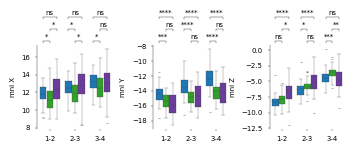

In [5]:
x = 'ch'
# y = 'mni_xr'
hue = 'project'

pairs=[(('1-2', 'Berlin'), ('1-2', 'London')),
       (('1-2', 'Berlin'), ('1-2', 'Düsseldorf1')),
       (('1-2', 'London'), ('1-2', 'Düsseldorf1')),
       (('2-3', 'Berlin'), ('2-3', 'London')),
       (('2-3', 'Berlin'), ('2-3', 'Düsseldorf1')),
       (('2-3', 'London'), ('2-3', 'Düsseldorf1')),
       (('3-4', 'Berlin'), ('3-4', 'London')),
       (('3-4', 'Berlin'), ('3-4', 'Düsseldorf1')),
       (('3-4', 'London'), ('3-4', 'Düsseldorf1'))]
# pairs=[(('LFP_1-2', 'Berlin'), ('LFP_1-2', 'London')),
#        (('LFP_1-2', 'Berlin'), ('LFP_1-2', 'Düsseldorf1')),
#        (('LFP_1-2', 'London'), ('LFP_1-2', 'Düsseldorf1')),
#        (('LFP_2-3', 'Berlin'), ('LFP_2-3', 'London')),
#        (('LFP_2-3', 'Berlin'), ('LFP_2-3', 'Düsseldorf1')),
#        (('LFP_2-3', 'London'), ('LFP_2-3', 'Düsseldorf1')),
#        (('LFP_3-4', 'Berlin'), ('LFP_3-4', 'London')),
#        (('LFP_3-4', 'Berlin'), ('LFP_3-4', 'Düsseldorf1')),
#        (('LFP_3-4', 'London'), ('LFP_3-4', 'Düsseldorf1'))]

# pairs = [
#     (('LFP_1-3', 'Berlin'), ('LFP_1-3', 'London')),
#     (('LFP_1-3', 'Berlin'), ('LFP_1-3', 'Düsseldorf1')),
#     (('LFP_1-3', 'London'), ('LFP_1-3', 'Düsseldorf1')),
#     (('LFP_2-4', 'Berlin'), ('LFP_2-4', 'London')),
#     (('LFP_2-4', 'Berlin'), ('LFP_2-4', 'Düsseldorf1')),
#     (('LFP_2-4', 'London'), ('LFP_2-4', 'Düsseldorf1'))
# ]


stat_params = dict(test='Mann-Whitney', text_format='star', loc='outside',
                   verbose=False, show_test_name=False, line_width=0.3)
params = dict(data=df, x=x, order=order, hue=hue, hue_order=hue_order,
              fliersize=0.1, saturation=1, linewidth=0.2)

fig, axes = plt.subplots(1, 3, figsize=(3.5, 1.6), sharex=True)

for i, y in enumerate(values):
    ax = axes[i]
    sns.boxplot(ax=ax, palette=palette, y=y, **params)

    annotator = Annotator(ax=ax, pairs=pairs, y=y, **params)
    annotator.configure(**stat_params)
    annotator.apply_and_annotate()
    ax.set_xlabel(None)
    ax.legend_.remove()
# fig.supxlabel('DBS channel')
sns.despine(bottom=True)
plt.tight_layout()
_save_fig(fig, 'dataset_mniCoords', save_dir, close=False, bbox_inches=None)

In [6]:
# x = 'project'

# pairs=[('Berlin', 'London'),
#        ('Berlin', 'Düsseldorf1'),
#        ('London', 'Düsseldorf1')]

# stat_params = dict(test='Mann-Whitney', text_format='star', loc='outside',
#                    verbose=False, show_test_name=False)
# params = dict(order=hue_order)

# fig, axes = plt.subplots(3, 3, figsize=(5, 7), sharex=True, sharey='col')

# for i, ch in enumerate(bip_chs):
#     for j, y in enumerate(rename.values()):
#         ax = axes[i, j]
#         data = df[df.ch == ch]
#         sns.boxplot(data=data, ax=ax, palette=palette, y=y, x=x, **params)

#         annotator = Annotator(data=data, ax=ax, pairs=pairs, y=y, x=x, **params)
#         annotator.configure(**stat_params)
#         annotator.apply_and_annotate()
#         ylabel = ch if j == 0 else None
#         title = y if i == 0 else None
#         ax.set_ylabel(ylabel)
#         ylim = ax.get_ylim()
#         ax.set_title(title, y=1.7)
#         ax.set_xlabel(None)
#         ax.set_xticks([])
#         # ax.tick_params(labelrotation=45, axis='x')
# sns.despine(bottom=True)
# # plt.subplots_adjust(hspace=0.5, wspace=0.5)
# # plt.subplots_adjust(wspace=-1, hspace=.5)
# plt.tight_layout()